<a href="https://colab.research.google.com/github/gabriel-drs/Realizando-analise-com-Pandas/blob/main/Planilhas_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começaremos importando as bibliotecas necessárias

In [ ]:
import pandas as pd

Carregando os Data Sets

In [ ]:
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

Juntando todos os arquivos

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
#Mostra as primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Mostrando as últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Verificando o tipo de dado
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Mudando os tipos de dados da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
#Verificando o tipo de dado
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

Fazendo o tratamento de valores faltantes

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Neste caso não temos, mas se tivessemos, poderiamos:
#Substituir os valores por algo, neste caso, pela média
df['Vendas'].fillna(df['Vendas'].mean, inplace = True)
#O inplace serve para salvar as alterações em memória e continuar sendo usada posteriormente no algoritmo

#Substituindo por 0
df['Vendas'].fillna(0, inplace = True)

#Apagando valores nulos 
df['Vendas'].dropna(inplace = True)

#Apagando as linhas de valores nulos com base em apenas uma linha
df.dropna(subset=['Vendas'], inplace = True)

#Apagando linhas de valores nulos em todas colunas
df.dropna(how='all', inplace = True)

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Conferindo algumas amostras
df.sample(14)

,Cidade,Data,Vendas,LojaID,Qtde
157,Salvador,2019-01-02,150.17,1036,2
43,Fortaleza,2019-01-01,191.52,1004,1
41,Salvador,2019-02-13,9.86,1035,2
35,Fortaleza,2019-01-01,133.97,1005,2
22,Recife,2019-01-01,39.53,983,3
87,Recife,2019-01-01,210.06,983,4
142,Natal,2019-01-02,7.12,1034,1
43,Natal,2019-04-01,538.00,853,3
195,Natal,2019-01-02,44.89,1036,3
207,Salvador,2019-01-02,46.70,1036,2


Criando novas colunas

In [ ]:
#Criando uma coluna chamada Receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Determinando a maior receita
df['Receita'].max()

3544.0

In [ ]:
#Menor receita
df['Receita'].min()

3.34

In [ ]:
#Determinando as lojas de maiores receitas
df.nlargest(5 ,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [ ]:
#As lojas de menores receitas
df.nsmallest(5, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [ ]:
#Agrupando por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados pela coluna Receita
df.sort_values('Receita', ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas** 

In [ ]:
 #Transformando a tabela de Data para inteiro
 df['Data'] = df['Data'].astype('int64')
 df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformando a coluna Data em Datetime
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupando por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
176,Salvador,2019-01-02,19.42,1035,3,58.26,2019
216,Natal,2019-01-02,5.82,1035,1,5.82,2019
190,Natal,2019-01-02,78.78,1035,3,236.34,2019
67,Natal,2019-02-14,379.00,852,2,758.00,2019
161,Salvador,2019-01-02,5.80,1036,1,5.80,2019


In [ ]:
#Extraindo o dia e mês das vendas
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
56,Salvador,2019-01-01,178.44,1035,3,535.32,2019,1,1
160,Salvador,2019-01-02,11.76,1034,1,11.76,2019,1,2
101,Aracaju,2018-01-01,16.62,1520,9,149.58,2018,1,1
55,Fortaleza,2019-01-01,214.73,1002,4,858.92,2019,1,1
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,2,13


In [ ]:
#Visualizando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df['Diferenca_Dia'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dia
145,Natal,2019-01-02,84.62,1034,2,169.24,2019,1,2,366 days
30,Natal,2018-10-02,856.00,853,4,3424.00,2018,10,2,274 days
74,Recife,2019-01-01,38.79,983,6,232.74,2019,1,1,365 days
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,2019,1,1,365 days


In [ ]:
#Criando a coluna do trimestre
df['trimestre_Venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dia,trimestre_Venda
204,Salvador,2019-01-02,151.41,1037,2,302.82,2019,1,2,366 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
12,Fortaleza,2019-01-01,80.73,1004,2,161.46,2019,1,1,365 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,2019,3,8,431 days,1
96,Salvador,2019-01-01,42.94,1034,3,128.82,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de Março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dia,trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dia,trimestre_Venda
109,Salvador,2019-03-02,124.37,1035,1,124.37,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
128,Recife,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,2019,3,7,430 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days,1


In [ ]:
#Fazendo uma contagem descendente de vendas das lojas
df['LojaID'].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Visualização de dados

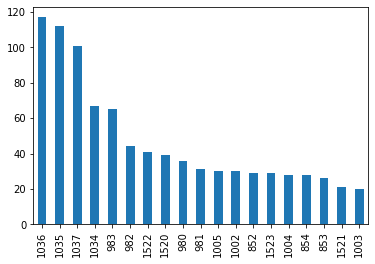

In [ ]:
df['LojaID'].value_counts(ascending = False).plot.bar();
#Mostra um total de vendas por loja em um gráfico de barras

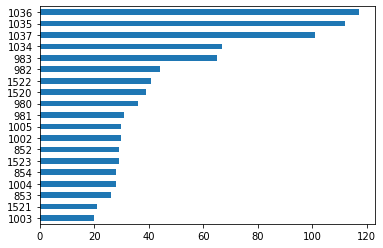

In [ ]:
#Agora faremos o mesmo gráfico, mas com barras horizontais
df['LojaID'].value_counts(ascending = True).plot.barh();

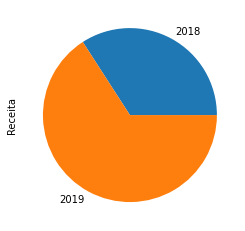

In [ ]:
#Gráfico de pizza co ano e receita
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

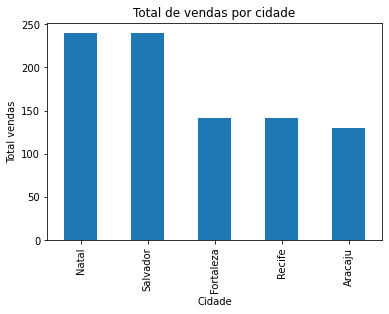

In [ ]:
#Adicionando título e nomeando os eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

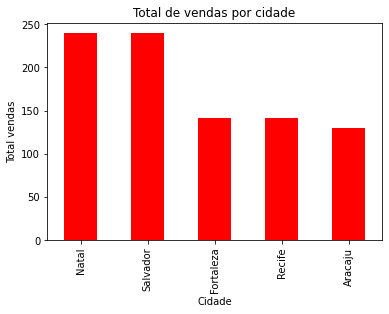

In [ ]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade', color = 'red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [ ]:
#Alterando o estilo
plt.style.use('ggplot')

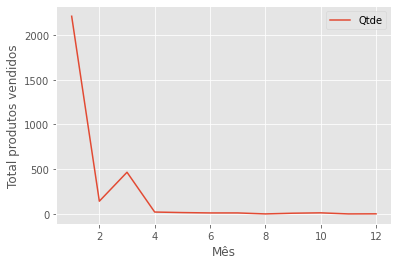

In [ ]:
#Criando um gráfico de linha com total de produtos vendidos por mês
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend()

In [ ]:
#Agrupando pelo número de produtos por mês
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Pegando apenas os valores onde o ano de venda é = 2019
df_2019 = df[df['Ano_Venda'] == 2019]

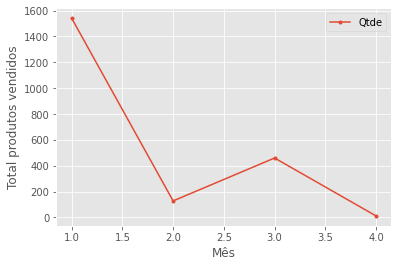

In [ ]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = '.')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

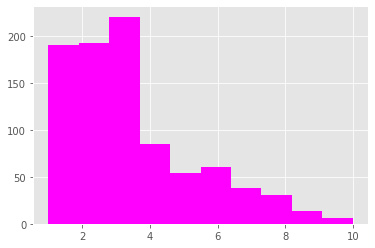

In [ ]:
#Gráfico de histograma
plt.hist(df['Qtde'], color = 'magenta');

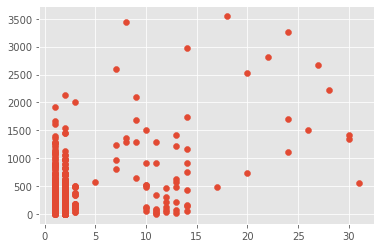

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita']);

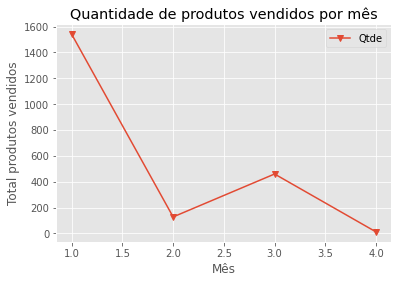

In [ ]:
#Salvando em formato PNG
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend()
plt.savefig('Gráfico Qtde x MES.png');